In [1]:
%reset -f
## I use jupyterthemes, these imports can be removed
from jupyterthemes import jtplot
jtplot.style()

## standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## stats model api import
import statsmodels.api as sm
## ML training and scoring imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
## ML models imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
## supress some warnings while doing the demo, DO NOT DO THIS ON REAL DATA
import warnings
warnings.filterwarnings('ignore')

In [2]:
## import data
automobile_df = pd.read_csv('datasets/auto-mpg-processed2.csv')
automobile_df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,0,31.5,4,98.0,68,2045,18.5,43
1,1,16.0,8,400.0,230,4278,9.5,47
2,2,23.0,4,120.0,88,2957,17.0,45
3,3,25.0,4,110.0,87,2672,17.5,50
4,4,22.0,6,250.0,105,3353,14.5,44


In [3]:
## Hold training and test scores from models that we train
result_dict  = {}


In [34]:
## build_model is used to instanciate estimaters, split training dataset, train model, test model, plot model results, return model results
def build_model(regression_fn, name_of_y_col, names_of_x_cols, dataset, test_frac=0.2, preprocess_fn = None, show_plot_Y=True, show_plot_scatter=True):
    ## seperate features and labels
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    ## preprocess if required
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    ## split data into training and testing data
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_frac)
    ## instanciate model
    model = regression_fn(x_train, y_train)
    ## test model
    y_pred = model.predict(x_test)
    ## output training score
    print("Training_score: ", model.score(x_train, y_train))
    print("Test_score: ",r2_score(y_test, y_pred))
    ## plot y
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(20,8))
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
    ## plot scatter
    if show_plot_scatter == True and len(names_of_x_cols) == 1:
        fig2, ax2 = plt.subplots(figsize=(20,8))
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        plt.legend(['Predicted line','Observered data'])
        plt.show()
    elif len(names_of_x_cols) != 1: ## if model has more than one feature, it cannot be scatterplotted
        print("Cannot Scatter Plot, model has more than one feature")
    ## return test score
    return { 'training_score':model.score(x_train, y_train), 'test_score':r2_score(y_test, y_pred) }
    

In [35]:
## prints out contents of result_dict for humans
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score',result_dict[key]['test_score'])
        print()

In [36]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    return model

Training_score:  0.6934686035982915
Test_score:  0.6893045830148296


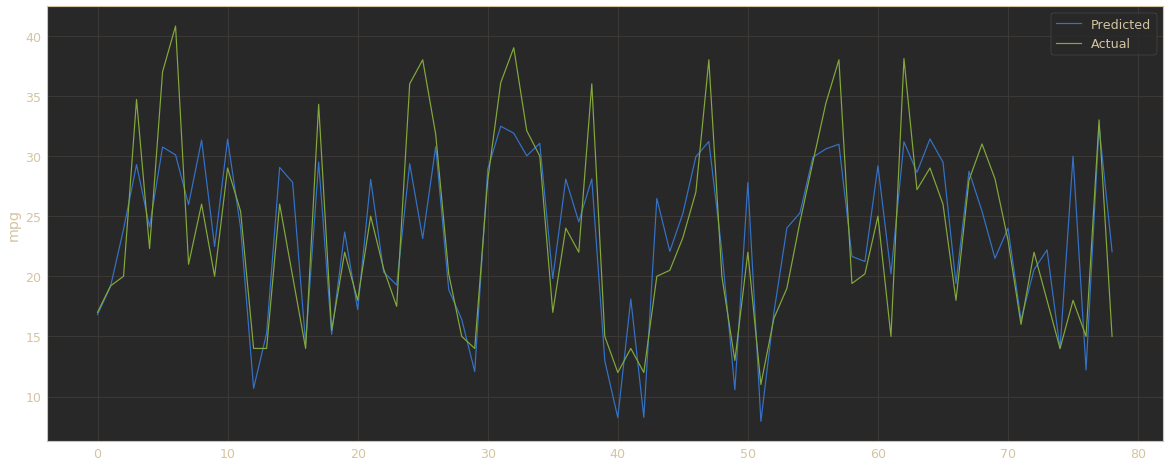

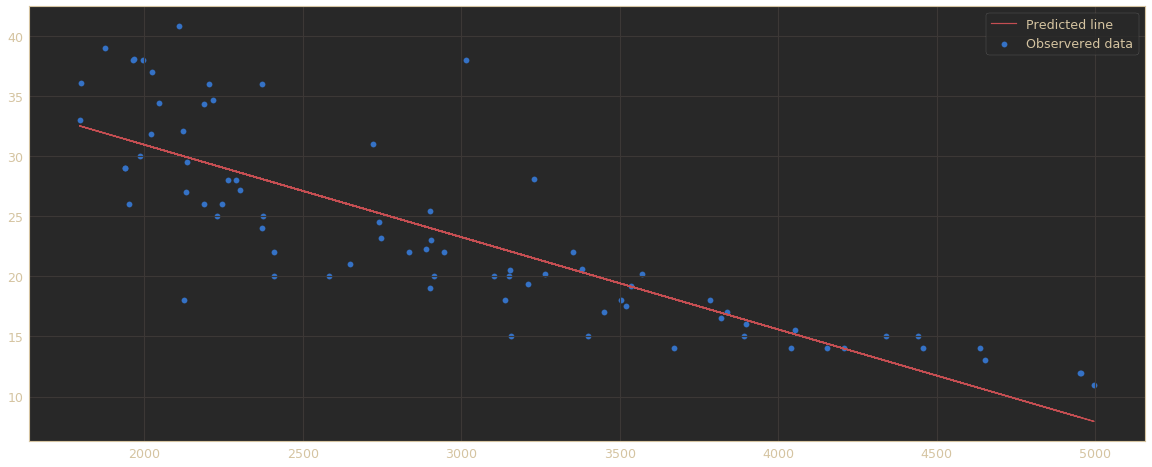

In [37]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg, 'mpg',['weight'],automobile_df, show_plot_Y=True)

Training_score:  0.7073370893814912
Test_score:  0.706689164785709


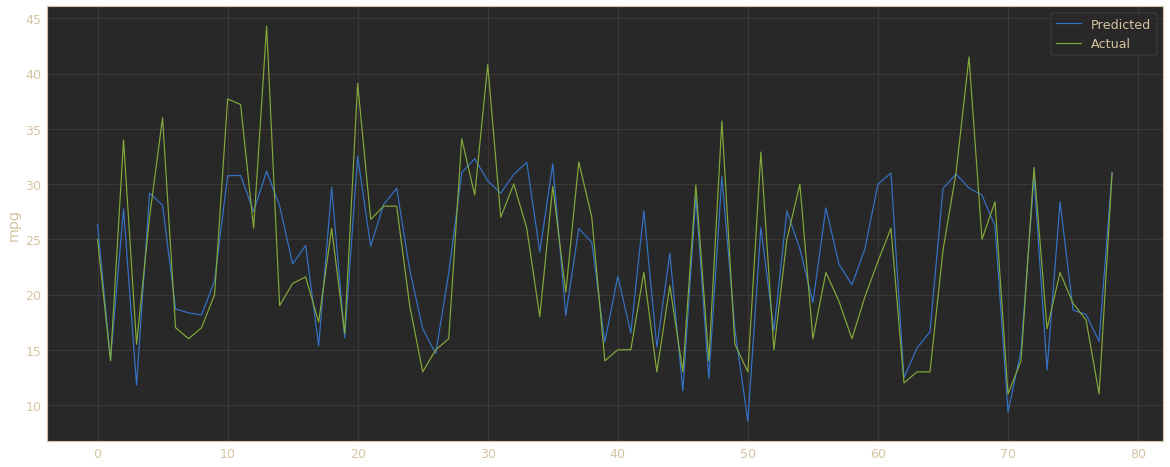

Cannot Scatter Plot, model has more than one feature


In [38]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

Training_score:  0.7107883136042252
Test_score:  0.6838068132366303


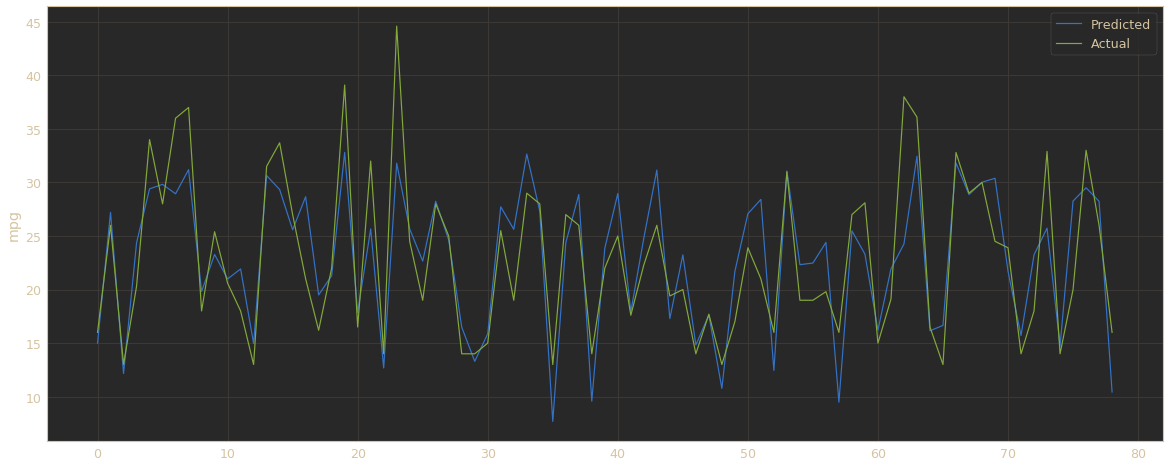

Cannot Scatter Plot, model has more than one feature


In [39]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg, 'mpg',['horsepower','weight'],automobile_df)

In [41]:
## Lesso regression introduces penalties to reduce overfitting with L1 regularization
## alpha is the constant you use to multiply the regularization default is 1, higher the number the more regularization, set to 0 for regular linearRegration, do not set alpha to 0
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    return model

Training_score:  0.7068911538553919
Test_score:  0.685948379949542


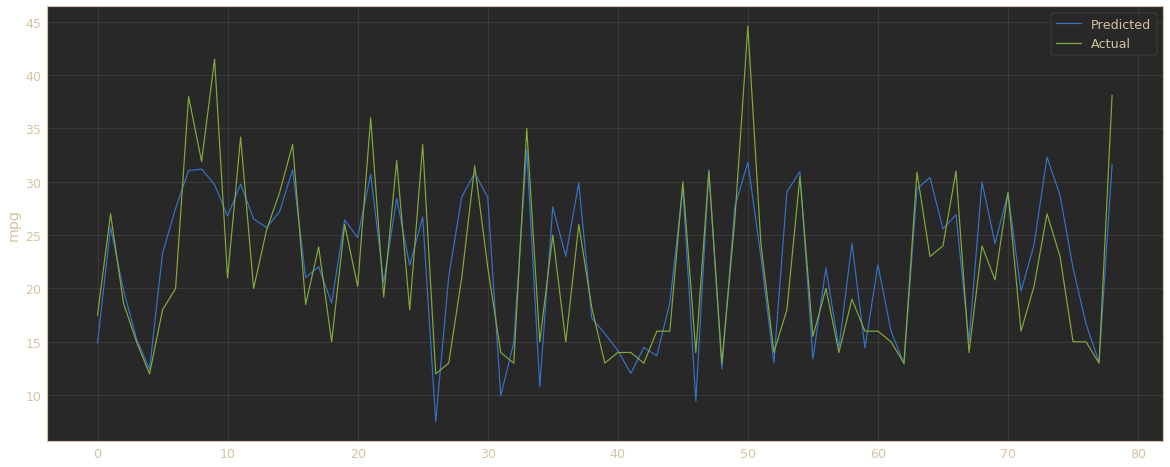

Cannot Scatter Plot, model has more than one feature


In [42]:
result_dict['mpg - kitchen_sink_lasso'] = build_model(lasso_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

In [43]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    return model

Training_score:  0.6752168570478344
Test_score:  0.701808924694079


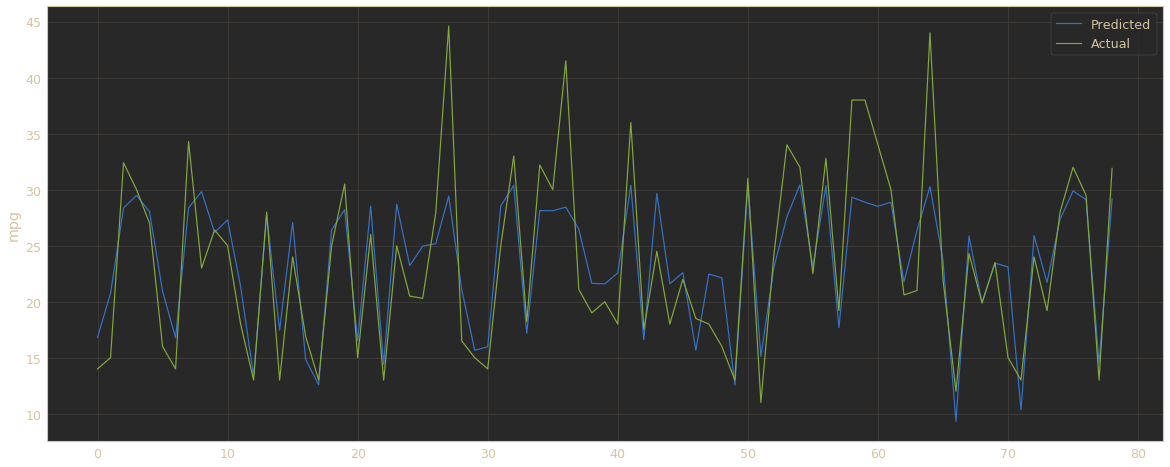

Cannot Scatter Plot, model has more than one feature


In [44]:
result_dict['mpg - kitchen_sink_ridge'] = build_model(ridge_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

In [46]:
## applies l1 and l2 regularization
## alpha determines strength
## l1_ratio is the elasticnet mixing parameter
## l1_ration = 0, then L2 penalty, if l1_ratio=1 then it will be an l1
## the dataset is so small that normalization will not affect the results
## warmstart means you want the model to reuse the solution to initialize the next step
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.6, normalize=False, max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    print('Equivalent to: ', equivalent_to)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    return model

Equivalent to:  OLS
Training_score:  0.6911548862857195
Test_score:  0.7625303785849011


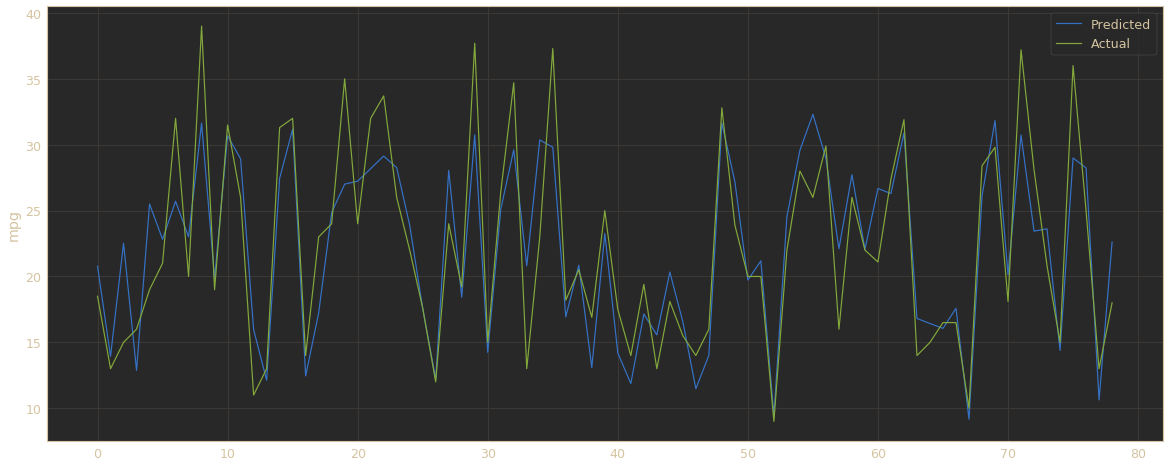

Cannot Scatter Plot, model has more than one feature


In [47]:
from functools import partial
## normally you don't want to use ols with elastic net instead use ols with the linear regression estimator
## in this cell alpha has been set to 0
result_dict['mpg - kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to="OLS"),'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

Equivalent to:  Lasso
Training_score:  0.6983450278753945
Test_score:  0.7360049304036849


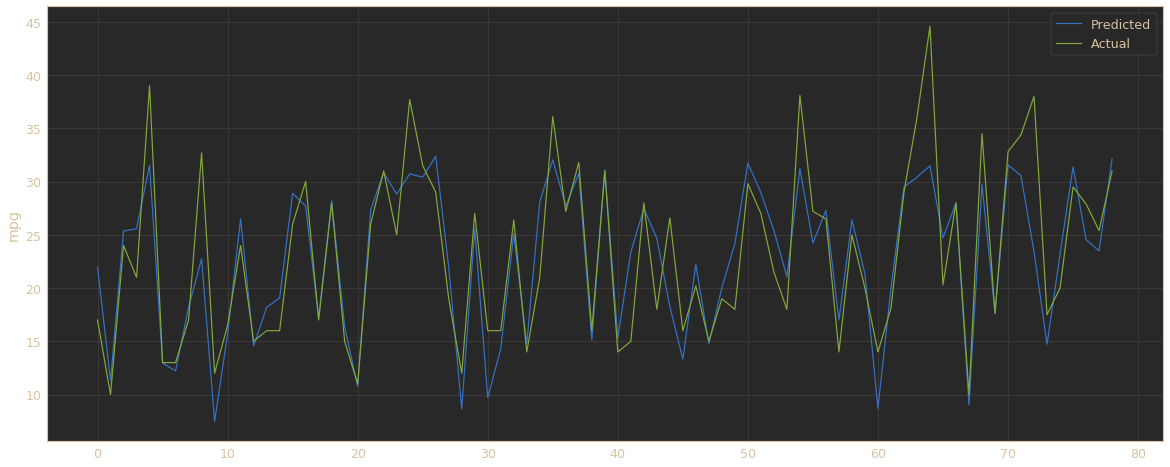

Cannot Scatter Plot, model has more than one feature


In [48]:
## in this cell alpha has been set to 1
result_dict['mpg - kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, equivalent_to="Lasso"),'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

Equivalent to:  Ridge
Training_score:  0.6875105334596547
Test_score:  0.7722313212456018


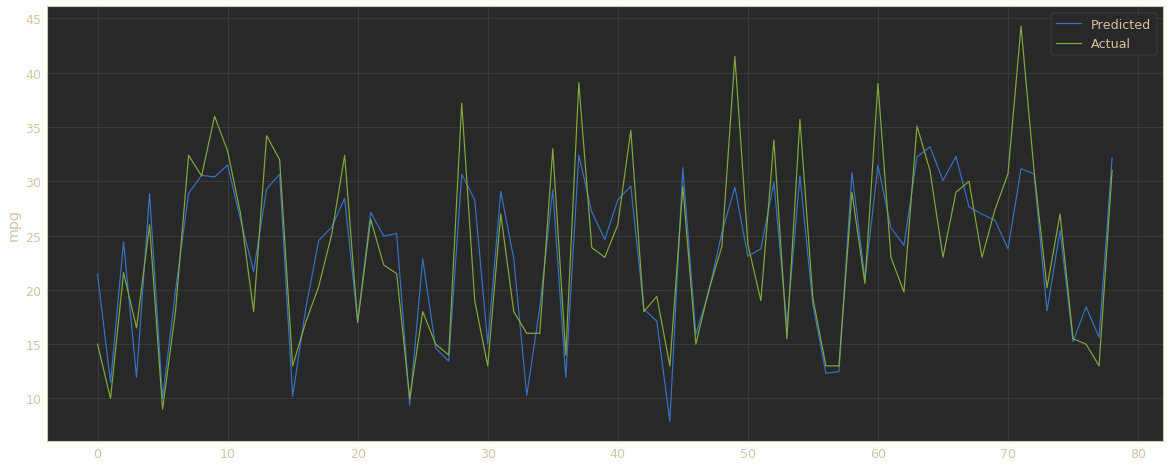

Cannot Scatter Plot, model has more than one feature


In [49]:
## alpha = 1, l1_ratio = 0
result_dict['mpg - kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1,l1_ratio=0, equivalent_to="Ridge"),'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

Equivalent to:  Elastic Net
Training_score:  0.7157441749934835
Test_score:  0.6714614658448638


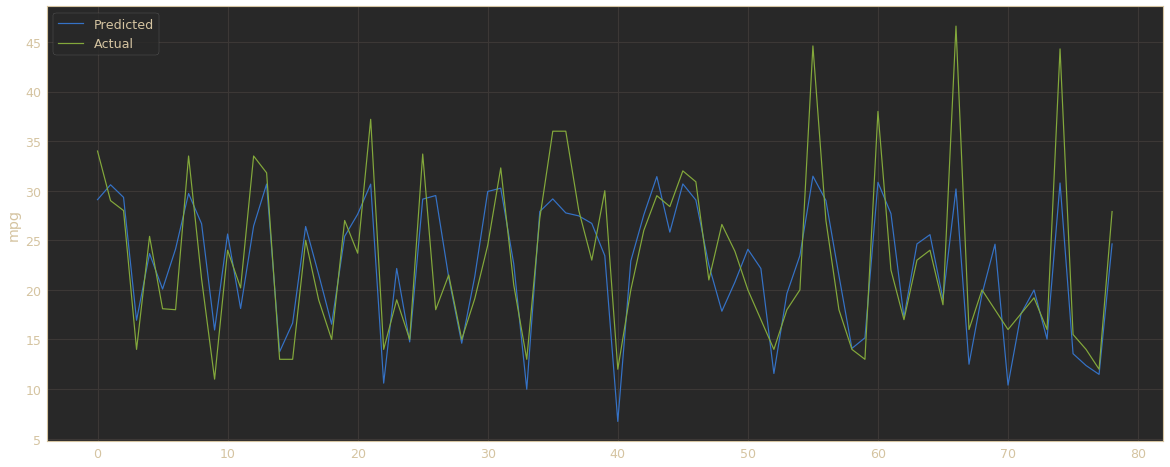

Cannot Scatter Plot, model has more than one feature


In [50]:
## alpha = 1, l1_ratio = .5
result_dict['mpg - kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1,l1_ratio=0.5),'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

In [52]:
## create an svr regressor
## eppsilon is the radias of the tube inwhich data will try and fit
## C is the penalty recieved for every datapoint outside of the tube
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    return model

Training_score:  0.6906836862770072
Test_score:  0.7308066089134913


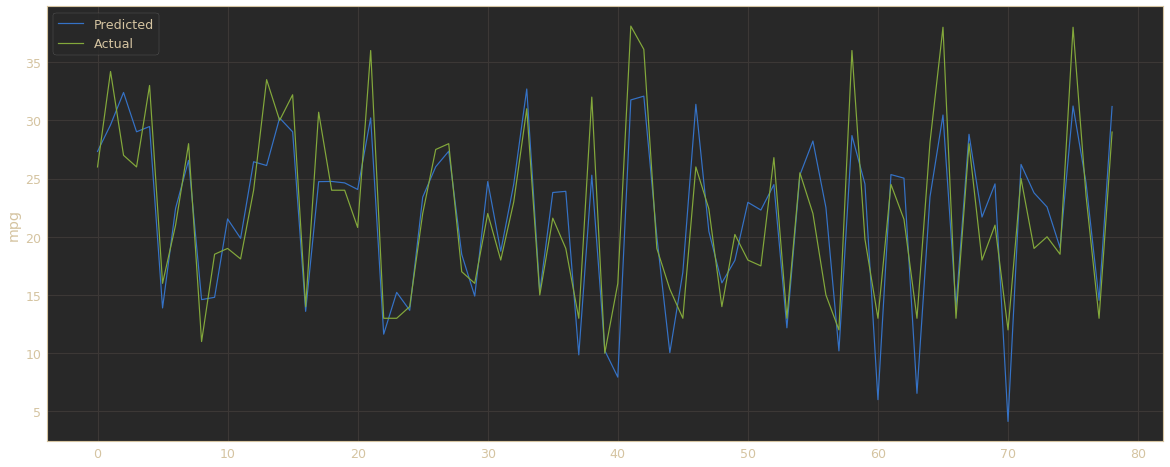

Cannot Scatter Plot, model has more than one feature


In [53]:
result_dict['mpg - kitchen_sink_svr'] = build_model(svr_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'], automobile_df)

In [54]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    return model

Training_score:  0.7696666079437001
Test_score:  0.6623436671121654


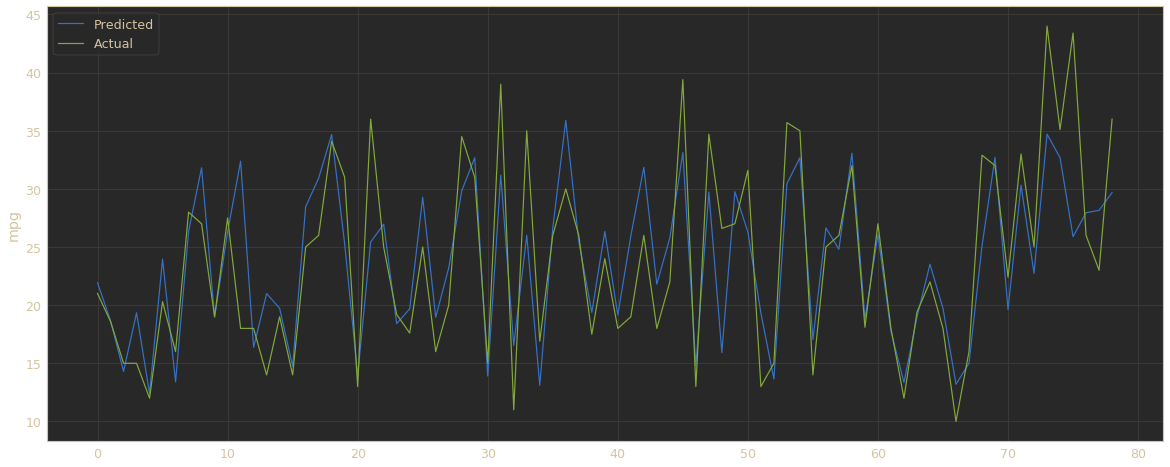

Cannot Scatter Plot, model has more than one feature


In [55]:
result_dict['mpg - kitchen_sink_kneighbors'] = build_model(kneighbors_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df)

In [57]:
## scale and standardize the dataset
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [58]:
def sgd_reg(x_train, y_train, max_iter=100, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    return model

Training_score:  0.7190107216729265
Test_score:  0.6574544061567449


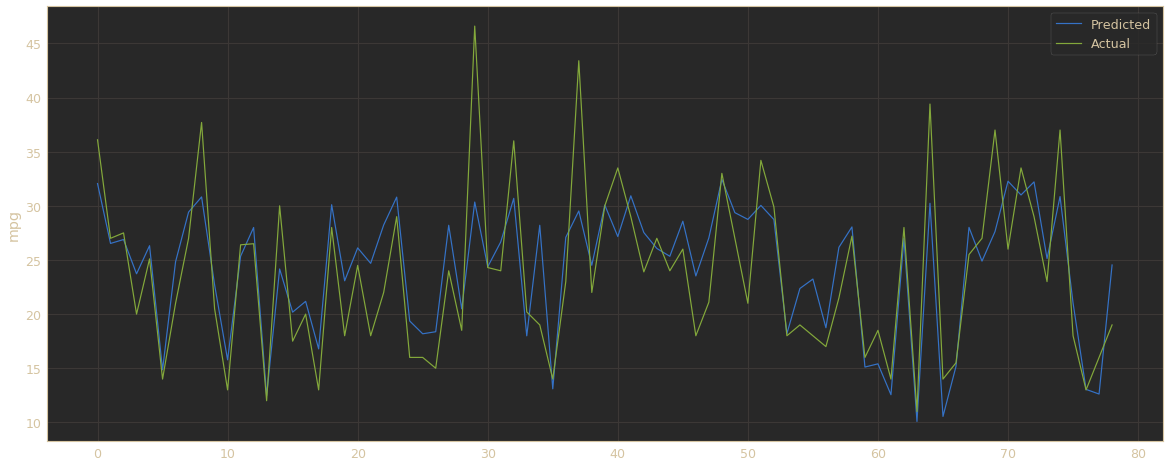

Cannot Scatter Plot, model has more than one feature


In [59]:
result_dict['Regression: mpg - kitchen_sink_sgd'] = build_model(sgd_reg, 'mpg',['cylinders','displacement','horsepower','weight','acceleration'], automobile_df, preprocess_fn=apply_standard_scaler)

In [62]:
## decision tree regression
def decision_tree_reg(x_train, y_train, max_depth=4):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    return model

Training_score:  0.8366756850714655
Test_score:  0.7622743080091432


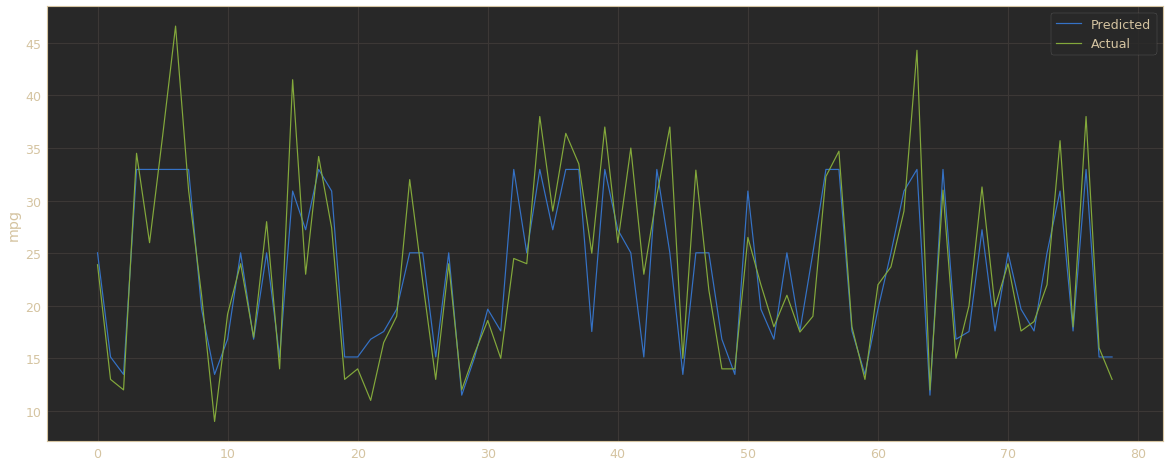

Cannot Scatter Plot, model has more than one feature


In [63]:
result_dict['mpg - kitchen_sink_decision_tree'] = build_model(decision_tree_reg, 'mpg',['cylinders', 'displacement','horsepower','weight','acceleration'],automobile_df)

In [64]:
## lars regression
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    return model


Training_score:  0.6905007608126952
Test_score:  0.7505463105698307


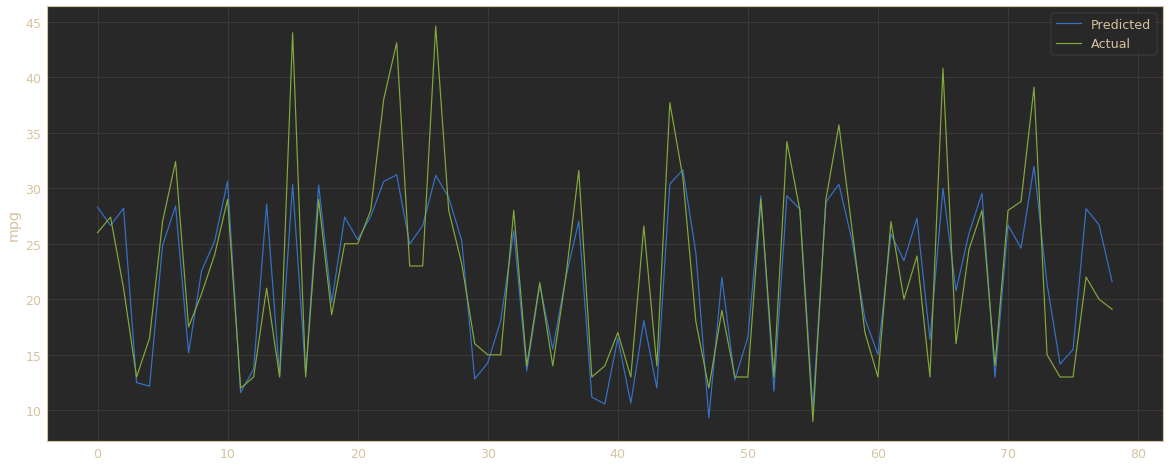

Cannot Scatter Plot, model has more than one feature


In [65]:
result_dict['mpg - kitchen_sink_lars'] = build_model(lars_reg, 'mpg',['cylinders', 'displacement','horsepower','weight','acceleration'],automobile_df)